# Neural Networks: Non-Linear models

  

<font color="blue"> Ketki Savle </font>

# Data: 
 
<b>Description</b>

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 


<b>There are four datasets: </b>

1) bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014] 

2) bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs. 

3) bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs). 

4) bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs). The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM). 

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).


<b>Attribute Information:</b>

 Input variables:

* <u>Bank client data:</u>

    1 - age (numeric) 
    
    2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-                 employed','services','student','technician','unemployed','unknown') 
    
    3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or               widowed)
    
    4 - education(categorical:'basic.4y','basic.6y','basic.9y',
     'high.school','illiterate','professional.course','university.degree','unknown') 
     
    5 - default: has credit in default? (categorical: 'no','yes','unknown') 
    
    6 - housing: has housing loan? (categorical: 'no','yes','unknown') 
    
    7 - loan: has personal loan? (categorical: 'no','yes','unknown')


* <u>Related with the last contact of the current campaign:</u>


    8 - contact: contact communication type (categorical: 'cellular','telephone') 
    
    9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec') 
    
    10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri') 
    
    11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the 
         output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. 
         Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark 
         purposes and should be discarded if the intention is to have a realistic predictive model.


* <u>Other attributes: </u>

    12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact) 

    13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999                  means client was not previously contacted) 

    14 - previous: number of contacts performed before this campaign and for this client (numeric) 

    15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')


* <u>Social and economic context attributes </u>

    16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
    
    17 - cons.price.idx: consumer price index - monthly indicator (numeric)
    
    18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric) 
    
    19 - euribor3m: euribor 3 month rate - daily indicator (numeric) 
    
    20 - nr.employed: number of employees - quarterly indicator (numeric)
    
    

* <b>Output variable (desired target): </b>

    21 - 1 - has the client subscribed a term deposit? (binary: 'yes','no') NOTE: at this point of time we will not proceed         with the actual calculations for prediction as the aim of this assignment is to only visualize the data. 

    We will start experimenting this objective with the help of bank dataset that we have chosen. Following are the codes in Python 3. 
    
    At the beginning we will simply import all packages that we require for computation and visualization of the data. After reading the information, we will take a quick look at whats in the CSV file and accordingly we will try to preprocess the data which would be appropriate for further model building.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("bank11.csv")
df.shape

(11162, 17)

In [2]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,1
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,1
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,1
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,1
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,1


In [3]:
print(df.head())

   age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome  deposit  
0    5   may      1042         1     -1         0  unknown        1  
1    5   may      1467         1     -1         0  unknown        1  
2    5   may      1389         1     -1         0  unknown        1  
3    5   may       579         1     -1         0  unknown        1  
4    5   may       673         2     -1         0  unknown        1  


Here we could observe that we have multiple features and we want to classify the client's information to understand if he/she has subscribed term deposits or no. The deposit entity has binary values, 0 and 1 where 1 means yes and 0 means no. 

In [4]:
print(df.describe())

                age       balance           day      duration      campaign  \
count  11162.000000  11162.000000  11162.000000  11162.000000  11162.000000   
mean      41.231948   1528.538524     15.658036    371.993818      2.508421   
std       11.913369   3225.413326      8.420740    347.128386      2.722077   
min       18.000000  -6847.000000      1.000000      2.000000      1.000000   
25%       32.000000    122.000000      8.000000    138.000000      1.000000   
50%       39.000000    550.000000     15.000000    255.000000      2.000000   
75%       49.000000   1708.000000     22.000000    496.000000      3.000000   
max       95.000000  81204.000000     31.000000   3881.000000     63.000000   

              pdays      previous       deposit  
count  11162.000000  11162.000000  11162.000000  
mean      51.330407      0.832557      0.473840  
std      108.758282      2.292007      0.499338  
min       -1.000000      0.000000      0.000000  
25%       -1.000000      0.000000     

As we describe the data, we get to understand the mean and standard deviation along with other distributive measures of the data. We certainly need to understand these values for further steps where our aim is to normally distribute the data. In terms of normalization of X dataset too, it will be handy to know what are the values of each feature available in bank dataset. 

# Visualization

We will start plotting features to know their impact on the target variable. In practical world, we may have many features but not all of them are important to classify the outcome.

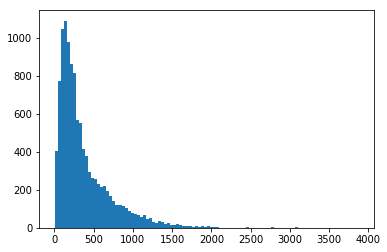

In [5]:
plt.hist((df.duration),bins=100)
plt.show()

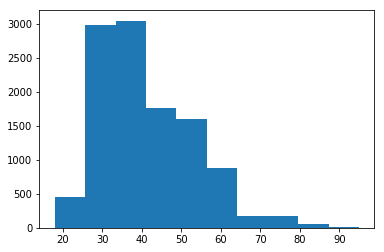

In [6]:
plt.hist(df.age,bins=10)
plt.show()

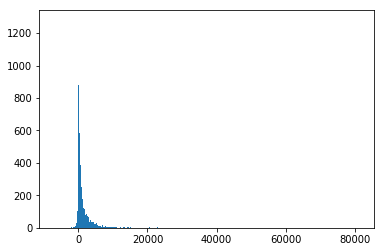

In [7]:
plt.hist(df.balance,bins=1000)
plt.show()

<b> Observation of histograms: </b>
    
    
Above, All the Histogram suggest that data is skewed towards left i.e. existence of skewness brings us to a point that we need to sample the data efficiently while classifiying the train_data and test_data !

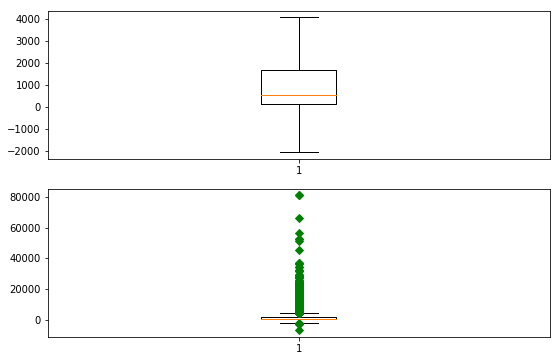

In [8]:
fig = plt.figure(1, figsize=(9, 6))
ax1 = fig.add_subplot(211)
bp1 = ax1.boxplot(df.balance,0,'')
ax2 = fig.add_subplot(212)
bp2 = ax2.boxplot(df.balance,0,'gD')
plt.show()

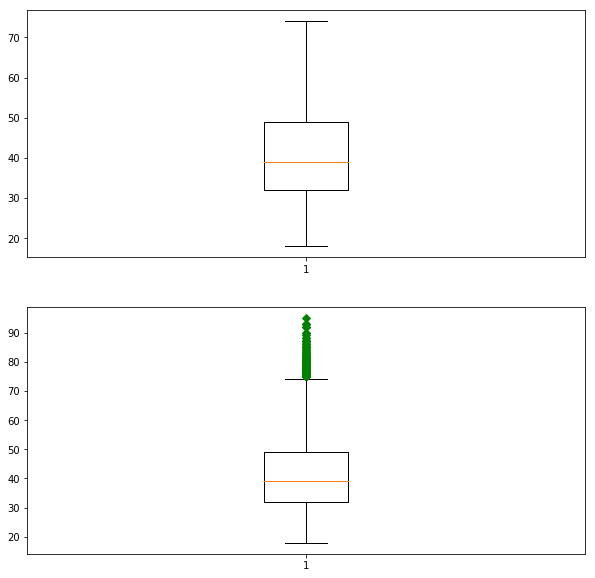

In [9]:
fig = plt.figure(1, figsize=(10, 10))
ax = fig.add_subplot(211)
bp = ax.boxplot(df.age,0,'')
ax = fig.add_subplot(212)
bp = ax.boxplot(df.age,0,'gD')
plt.show()

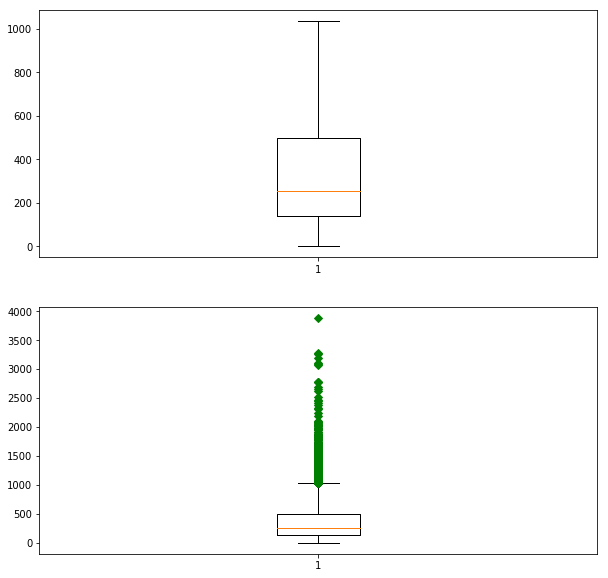

In [10]:
fig = plt.figure(1, figsize=(10, 10))
ax1 = fig.add_subplot(211)
bp1 = ax1.boxplot(df.duration,0,'')
ax2 = fig.add_subplot(212)
bp2 = ax2.boxplot(df.duration,0,'gD')
plt.show()

<b> Observation of a box- whisker plot</b>


Above boxplot suggest how the data is spread across the dataset Most of the data is lying above the 3rd quantile by multiplication factor of 1.5 i.e. by theortical aspect the data points are outlier for most of the data points.

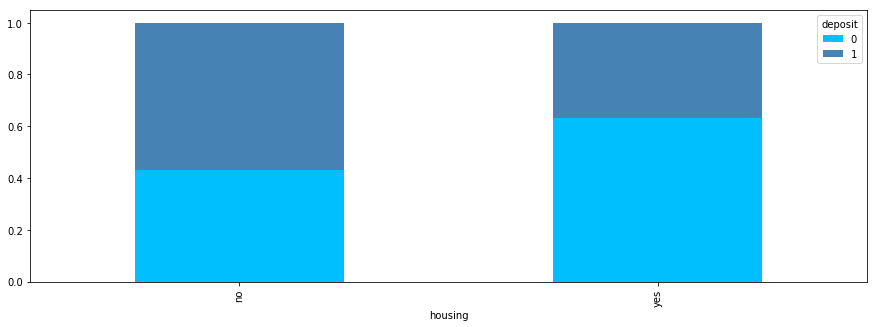

In [11]:
draw_data = pd.crosstab(df.housing, df.deposit)
draw_data.div(draw_data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['deepskyblue','steelblue'],grid=False, figsize=(15, 5))
plt.show()

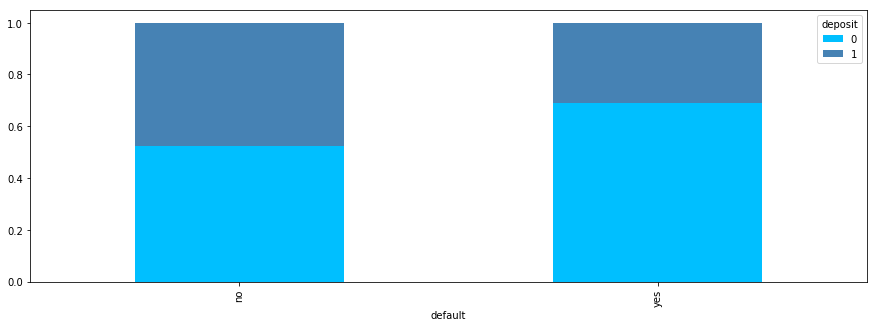

In [12]:
draw_data = pd.crosstab(df.default, df.deposit)
draw_data.div(draw_data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['deepskyblue','steelblue'],grid=False, figsize=(15, 5))
plt.show()

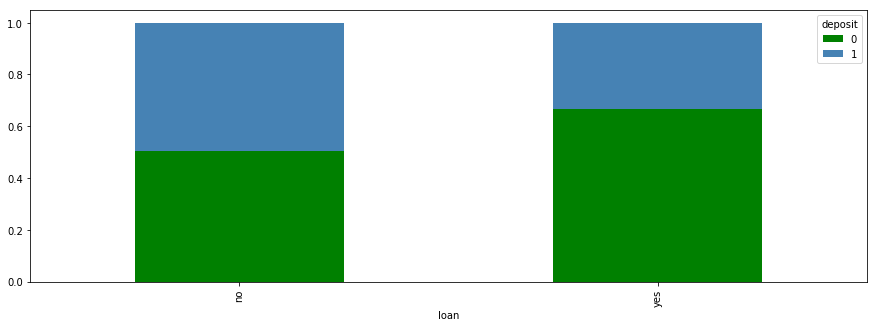

In [13]:
draw_data = pd.crosstab(df.loan, df.deposit)
draw_data.div(draw_data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['green','steelblue'],grid=False, figsize=(15, 5))
plt.show()

By looking at the bar graph, we can observe that Feature vs Label the data is wide spread i.e. we cannot predict completely based on feature alone. Hence we will preprocess the data in such a way that all our attributes will be a "Categorical" input variables for classifying deposit. 

Lets visualize more..

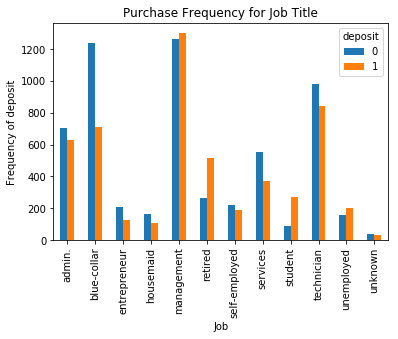

In [14]:
%matplotlib inline
pd.crosstab(df.job,df.deposit).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of deposit')
plt.savefig('purchase_fre_job')

In the bar chart plotted above, we are trying to decide whether job will be a good attribute for moving on with classification. It can be understood that the frequency of purchase of the deposit depends a great deal on the job title. Thus, the job title can be a good predictor of the outcome variable.

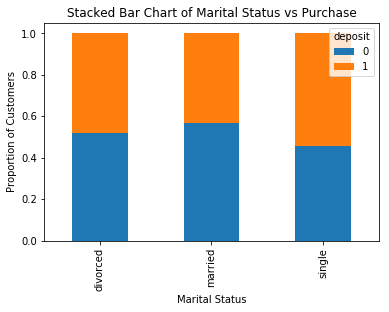

In [15]:
table=pd.crosstab(df.marital,df.deposit)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')
plt.savefig('mariral_vs_pur_stack')

Marital status attribute does not really help us in differentiating much and hence we would drop this attribute while building a model.

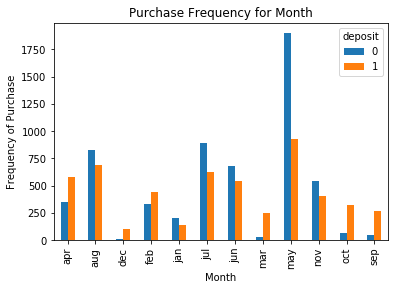

In [16]:
pd.crosstab(df.month,df.deposit).plot(kind='bar')
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_month_bar')

Based on the insights of the attributes which do and do not influence the classification we will begin to preprocess the data. 
Lets drop some of the attributes to simplify our model and read the data to understand what we have next.

# Preliminary Observations: 

These are the highlights from all observations mentioned above: 

1. Feature vs Label the data is wide spread
2. We have chosen job default housing loan contact month campaign for classification of deposite.
3. Most of the data is lying above the 3rd quantile by multiplication factor of 1.5 i.e. by theortical aspect the data points are outlier for most of the data points.
4. All the Histogram suggest that data is skewed towards left

In [17]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,1
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,1
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,1
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,1
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,1


# Preprocessing:

We can see that the job column has values in terms of job title and as discussed above yes we do need this attribute.The deafult, loan and house has "yes" and "No" values. Months are named by their values and campaign shows numerical values. We shall convert all these values in categorical form and compute further.

After preprocessing is done, lets split the data into train and test set for further analysis and read the top 5 rows to validate that the changes have taken place correctly.

In [18]:
# Convert these variables into categorical variables
df["housing"] = df["housing"].astype('category').cat.codes
df["job"] = df["job"].astype('category').cat.codes
df["default"] = df["default"].astype('category').cat.codes
df["loan"] = df["loan"].astype('category').cat.codes
df["contact"] = df["contact"].astype('category').cat.codes
df["month"] = df["month"].astype('category').cat.codes
df["balance"] = df["balance"].astype('category').cat.codes
df["duration"] = df["duration"].astype('category').cat.codes
df["campaign"] = df["campaign"].astype('category').cat.codes
#df["deposit"] = df["deposit"].astype('category').cat.codes
# Create train and test splits

In [19]:
data = df.drop(['age','marital','education','day','poutcome','previous','pdays'], axis=1)

In [20]:
data.head()

,job,default,balance,housing,loan,contact,month,duration,campaign,deposit
0,0,0,2288,1,0,2,8,1021,0,1
1,0,0,469,0,0,2,8,1283,0,1
2,9,0,1618,1,0,2,8,1246,0,1
3,7,0,2356,1,0,2,8,577,0,1
4,0,0,608,0,0,2,8,671,1,1


In [21]:
df = df.drop(['day','poutcome'],axis=1)
y=df['deposit']
df = df.drop(['deposit','previous','pdays','age','education','marital'],axis=1)
df.head()


,job,default,balance,housing,loan,contact,month,duration,campaign
0,0,0,2288,1,0,2,8,1021,0
1,0,0,469,0,0,2,8,1283,0
2,9,0,1618,1,0,2,8,1246,0
3,7,0,2356,1,0,2,8,577,0
4,0,0,608,0,0,2,8,671,1


In [22]:
df.shape

(11162, 9)

In [23]:
from sklearn.model_selection import train_test_split


X= df

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4, random_state=123, stratify=y)
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [24]:
print(y.shape)

(11162,)


In [25]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: deposit, dtype: int64

In [26]:
print(df.groupby(y).size())

deposit
0    5873
1    5289
dtype: int64


After our data is ready, lets start computing the algorithms.

In [27]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6697, 9)
(4465, 9)
(6697,)
(4465,)


In [28]:
y_train = y_train.reshape(y_train.shape[0],1)
y_test = y_test.reshape(y_test.shape[0],1)
print(y_train.shape)
print(y_test.shape)

(6697, 1)
(4465, 1)


# Summary of Neural Networks 

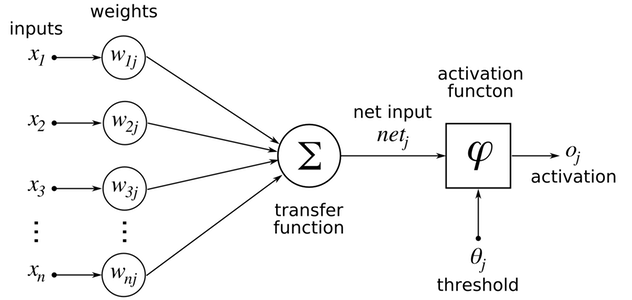

Artificial neural networks are characterized by containing adaptive weights along paths between neurons that can be tuned by a learning algorithm that learns from observed data in order to improve the model. 

The cost function is what’s used to learn the optimal solution to the problem being solved. This involves determining the best values for all of the tunable model parameters, with neuron path adaptive weights being the primary target, along with algorithm tuning parameters such as the learning rate. It’s usually done throughoptimization techniques such as gradient descent or stochastic gradient descent.


Architecturally, an artificial neural network is modeled using layers of artificial neurons, or computational units able to receive input and apply an activation function along with a threshold to determine if messages are passed along.

The first layer is the input layer, followed by one hidden layer, and lastly by an output layer. Each layer can contain one or more neurons.

Models can become increasingly complex, and with increased abstraction and problem solving capabilities by increasing the number of hidden layers, the number of neurons in any given layer, and/or the number of paths between neurons. Note that an increased chance of overfitting can also occur with increased model complexity.

Additionally, models are characterized and tunable by the activation function used to convert a neuron’s weighted input to its output activation

# Summary of Non Linear Logistic Regression: 

Logistic regression uses an equation as the representation, very much like linear regression.

Input values (x) are combined linearly using weights or coefficient values (referred to as the Greek capital letter Beta) to predict an output value (y). A key difference from linear regression is that the output value being modeled is a binary values (0 or 1) rather than a numeric value.

Below is an example logistic regression equation:

y = e^(b0 + b1*x) / (1 + e^(b0 + b1*x))

Where y is the predicted output, b0 is the bias or intercept term and b1 is the coefficient for the single input value (x). Each column in your input data has an associated b coefficient (a constant real value) that must be learned from your training data.

The actual representation of the model that you would store in memory or in a file are the coefficients in the equation (the beta value or b’s).

The non linear logistic regression is useful in classifying nonlinear data. For multiclass classification it uses softmax function. 

# Implementation of Neural network class: 


In [29]:
from nn import NeuralNet
import tensorflow as tf
import numpy as np

C:\Users\Ketki\Anaconda_new\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Explanation for code: 

In the class implementation, we are first simply importing the NuralNet class. 

Let’s now build a 3-layer neural network with one input layer, one hidden layer, and one output layer. The number of nodes in the input layer is determined by the dimensionality of our data, 9. Similarly, the number of nodes in the output layer is determined by the number of classes we have, also 2. The input to the network will be x- and y has two values of class, one for class 0 (“not deposited”) and one for class 1 (“deposited”). In init function, we will initialize all calculations parameters such as weights, biases, rho. We also want to make sure that we standardize the class here as per requirement. 

We can choose the dimensionality of the hidden layer. The more nodes we put into the hidden layer the more complex functions we will be able fit. But higher dimensionality comes at a cost. First, more computation is required to make predictions and learn the network parameters. A bigger number of parameters also means we become more prone to overfitting our data.


We also need to pick an activation function for our hidden layer. The activation function transforms the inputs of the layer into its outputs. A nonlinear activation function is what allows us to fit nonlinear hypotheses. Common chocies for activation functions are tanh, the sigmoid function, or ReLUs. We have used tanh, which performs quite well in many scenarios. A primary advantage of these functions is that their derivate can be computed using the original function value. 

In [30]:
from nn import NeuralNet

class NeuralNetLogReg(NeuralNet):
    """ neural network class for regression
        
        Parameters
        ----------
        nunits: list
            the number of inputs, hidden units, and outputs

        Methods
        -------
        set_hunit    
            update/initiate weights

        pack 
            pack multiple weights of each layer into one vector

        forward
            forward processing of neural network

        backward
            back-propagation of neural network

        train
            train the neural network

        use
            appply the trained network for prediction

        Attributes
        ----------
        _nLayers
            the number of hidden unit layers 

        rho
            learning rate

        _W
            weights
        _weights
            weights in one dimension (_W is referencing _weight)

        stdX
            standardization class for data
        stdT
            standardization class for target

        Notes
        -----
        
    """
    NN=0.5
    def __init__(self, nunits):
        self._nLayers=len(nunits)-1
        self.rho = [0.1] * self._nLayers
        self._W = []
        wdims = []
        lenweights = 0
        self.stdX = None
        self.stdT = None
        self.stdTarget = True
        for i in range(self._nLayers):
            nwr = nunits[i] + 1
            nwc = nunits[i+1]
            wdims.append((nwr, nwc))
            lenweights = lenweights + nwr * nwc
            
        self._weights = np.random.uniform(-0.1,0.1, lenweights) 
        start = 0  # fixed index error 20110107
        for i in range(self._nLayers):
            end = start + wdims[i][0] * wdims[i][1] 
            self._W.append(self._weights[start:end])
            self._W[i].resize(wdims[i])
            start = end
            
        self.error1 = []   
        

    def forward(self,X):
        t = X 
        Z = []

        for i in range(self._nLayers):
            Z.append(t)
            if i == self._nLayers - 1:
                t = np.dot(self.add_ones(t), self._W[i])
                if not isinstance(t, np.ndarray):
                    z = np.asarray(t)
                    f = np.exp(z) 
                    t = f / (np.sum(f, axis=1, keepdims=True) if len(z.shape) == 2 else np.sum(f))
            else:
                t = np.tanh(np.dot(self.add_ones(t), self._W[i]))
              
        return (t, Z)

    def _objectf(self, T, Y, wpenalty):
        print(T.shape)
        E = 0.5 * np.mean(np.square(T - Y)) + wpenalty
        self.error1.append(E) 
        return E

    def train(self, X, T, **params):
        NeuralNet.train(self, X, T, **params)
        pass
       
    def use(self, X,retZ=True):
        if self.stdX:
            Xs = self.stdX.standardize(X)
        else:
            Xs = X
        Y, Z = self.forward(Xs)
        classes = np.argmax(Y,axis = 1)
        if self.stdT is not None:
            Y = self.stdT.unstandardize(Y)
        return classes,Y,self.error1

# Explanation: 



In [31]:

y_train = y_train.reshape(y_train.shape[0],1)
#y_test = np.reshape(-1,1)
print(y_train.shape)




(6697, 1)


# Using the class on our data: 

Below in the code we shall define our x and y train and test data in the implemented neural network class. 
We are assigning X as X_train and T as target variable with training samples. 

We shall call our NeuralNetLogReg class in nn variable by passint the values of [9,3,1]. Here we have 9 input features of X, 3 layers and 1 output variable with two values. 

Once we pass the X and T through train.nn, we will also pass the test data through nn.use. In our superclass we have defined use function that takes car of applying the trained model on our test data to further calculate its accuracy. 

In [32]:
import numpy
from sklearn.datasets import make_circles

X = X_train 

T = y_train


nn = NeuralNetLogReg([9,3,1]) #one output variable but internally has 2 values!
nn.train(X, T)
c, Y, e = nn.use(X_test)
print(Y)



(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)


(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)
(6697, 1)


The output of the aove comand renders a 1-d array with values for Y. We shall use these for further classification accuracy calculations. 

In [33]:
from sklearn.metrics import accuracy_score
k = accuracy_score(y_test,c)
from sklearn.metrics import average_precision_score
p = average_precision_score(y_test, c)
print("Precision of the model =", p)

Precision of the model = 0.47390817469204927


The above code calculates the specificity of a model by declaring precision matrix. and the model is showing precision as 47% 

In [34]:
Pred=np.zeros(Y.shape[0])
for i in range(Y.shape[0]):
    if(Y[i]>= 0.5):
        Pred[i]=1
    else:
        Pred[i]=0
Pred= Pred.reshape(Pred.shape[0],1)
print(Pred.shape)    
dumb = np.sum(y_test)/Pred.shape[0]*100
#print('Accuracy on test set is',(np.sum(y_test)/Pred.shape[0])*100)
#print("Accuracy on test set is", dumb)

(4465, 1)


Lets plot the accuarcy. 

Acuracy of the test set = 52.609182530795074 %


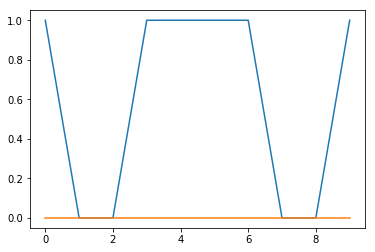

In [35]:
plt.clf()
p1 = y_test[0:10]
p2 = c[0:10]
plt.plot(p1)
plt.plot(p2)
print('Acuracy of the test set =',k*100,"%")

Lets print the Y array that we have to refer for classification along with other variables. 

In [36]:
Y

array([[0.66839487],
       [0.21441474],
       [0.03466569],
       ...,
       [0.00627635],
       [0.71728733],
       [0.08622822]])

In [37]:
X_train

array([[   4,    0,  871, ...,    3,  149,    0],
       [   1,    0, 2060, ...,    5,  707,    1],
       [  10,    0, 1105, ...,    1,  219,    0],
       ...,
       [   4,    1, 1284, ...,    0,  710,    0],
       [   9,    0,  313, ...,    5,   71,    3],
       [   4,    0, 1446, ...,    1,  486,    1]], dtype=int16)

In [38]:
y_train

array([[1],
       [1],
       [1],
       ...,
       [1],
       [0],
       [0]], dtype=int64)

In [39]:
y_test

array([[1],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]], dtype=int64)

# Plots and Analysing the plots: 

After printing the values of all variables post feeding through nn class lets plot the architecture from the values that we have got. 

Following plot explains the architecture of layers using the train data. We can observe that for output we have 2 values, 0 and 1 and after the grid at the left hand side, the values have been merged on 0 and 1. Here every input feature has followed the layers and eventually has converged and classified between 0 and 1. 

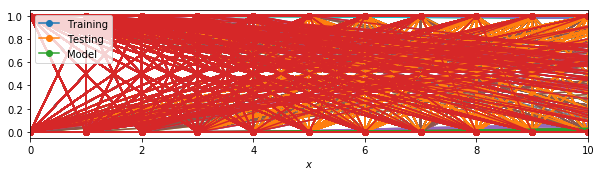

In [40]:
import IPython.display as ipd
nReps = 2
#errorx = np.array(err)
fig = plt.figure(figsize=(10,8))
for reps in range(nReps):   
        plt.subplot(3,1,1)
        plt.plot(X_train,y_train,'o-',X_test,y_test,'o-',X_test,y_test,'o-')
        plt.xlim(0,10)
        plt.legend(('Training','Testing','Model'),loc='upper left')
        plt.xlabel('$x$')
        ipd.clear_output(wait=True)
        ipd.display(fig)
ipd.clear_output(wait=True)

Lets plot the train data and visualize the classified details. again using different plot. 

Here also we see that it will render same style of the graph and the interpretation remains the same. 

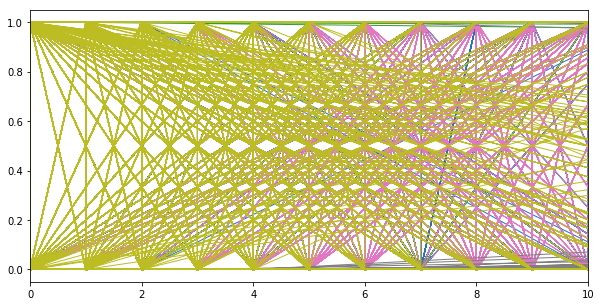

In [41]:
plt.figure(figsize=(10,5))
plt.xlim(0,10)
plt.plot(X_train,y_train, marker='o', linewidth=1, markersize=1)

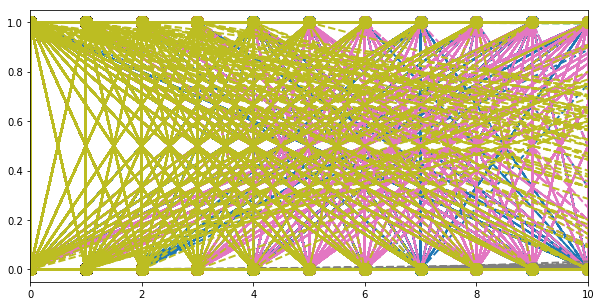

In [42]:
plt.figure(figsize=(10,5))
plt.xlim(0,10)
plt.plot(X_test, y_test, marker='o', linestyle='dashed',
        linewidth=2, markersize=12)

The graph above is ran on test data and it represents how the data is classified between 0 and 1 for test dataset. 

In [43]:
Pred=np.zeros(Y.shape[0])
for i in range(Y.shape[0]):
    if(Y[i]>= 0.5):
        Pred[i]=1
    else:
        Pred[i]=0
Pred= Pred.reshape(Pred.shape[0],1)
print(Pred.shape)    
dumb = np.sum(y_test)/Pred.shape[0]*100
#print('Accuracy on test set is',(np.sum(y_test)/Pred.shape[0])*100)
#print("Accuracy on test set is", dumb)

(4465, 1)


In [44]:
import tensorflow as tf

In [45]:
import numpy as np
import abc
from abc import ABC, abstractmethod
# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    

class Classifier(BaseModel):
    """
        Abstract class for classification 
        
        Attributes
        ==========
        meanX       ndarray
                    mean of inputs (from standardization)
        stdX        ndarray
                    standard deviation of inputs (standardization)
    """

    def __init__(self, ):
        self.meanX = None
        self.stdX = None

    def normalize(self, X):
        """ standardize the input X """
        
        if not isinstance(X, np.ndarray):
            X = np.asanyarray(X)

        self.meanX = np.mean(X, 0)
        self.stdX = np.std(X, 0)

        # TODO: Finish this normalization
        Xs = (X - self.meanX) / self.stdX
        return Xs

    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abc.abstractmethod
    def train(self, X, T):
        pass
    
    @abc.abstractmethod
    def use(self, X):
        pass 

In [46]:
class LDA(Classifier):
    
    def __init__(self):
        Classifier.__init__(self)
        self.cov=None
        self.mu={}
        self.prior={}
        
    def LDA(self, X, mu, sigma, prior):
        return np.sum(np.dot(X,np.linalg.inv(sigma))*mu, axis=1)-1/2*np.dot(mu,np.linalg.inv(sigma))@mu+np.log(prior)

    def train(self, X, T):
        self.targetType=list(set(T.flatten()))
        N=X.shape[0]
        self.cov=np.cov(X.T)
        for t in self.targetType:
            Xsub=X[np.where(T == t)[0],:]
            self.mu[t]=np.mean(Xsub, 0)
            self.prior[t]=Xsub.shape[0]/N
            
    def use(self, X):
        probs={}
        for t in self.targetType:
            probs[t]=self.LDA(X, self.mu[t], self.cov, self.prior[t])
        target=np.zeros(X.shape[0])
        for i in range(X.shape[0]):
            target[i]=self.targetType[np.argmax([probs[t][i] for t in self.targetType])]
        return target

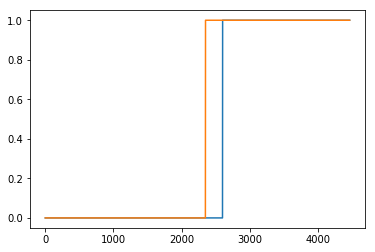

In [47]:
lda = LDA ()
lda.train(X_train, y_train)
Xt = lda.use(X_test)
plt.plot(np.sort(Xt,0))
plt.plot(np.sort(y_test,0)) # target

In [48]:
rows = X.shape[0]
lda.train(X_train, y_train)
l=lda.use(X_train)
print(l)

[0. 1. 0. ... 1. 0. 1.]


In [49]:
accuracy = (np.sum(y_train)/X_train.shape[0])*100
print("Training accuracy is:", accuracy)


Training accuracy is: 47.37942362251755


In [50]:
lda.train(X_test, y_test)
l=lda.use(X_test)
accuracy = (np.sum(y_test)/X_train.shape[0])*100

print("Test accuracy is :", accuracy)


Test accuracy is : 31.596237121099


In [51]:
from sklearn import preprocessing

# Examine the correct implementation with preliminary test: 

Text(0.5,1,'Circles')

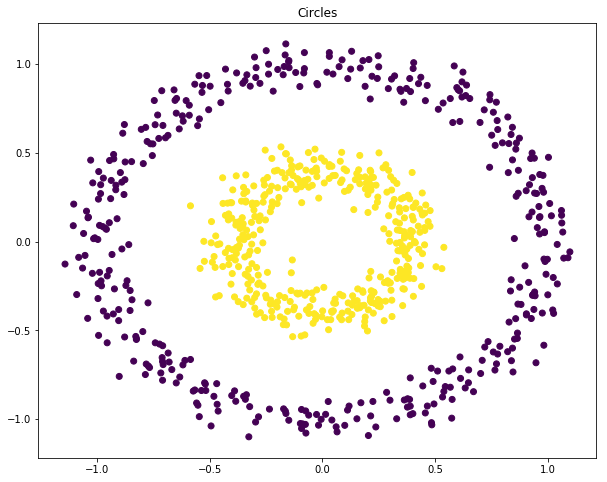

In [52]:
from sklearn.datasets import make_circles

X, T = make_circles(n_samples=800, noise=0.07, factor=0.4)

plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], marker='o', c=T)
plt.title("Circles")

In [53]:
import numpy 
X1 = numpy.array([0,0,1,0,0,1,1,1]).reshape(4,2)
T1 = numpy.array([0,1,1,0,1,0,0,1]).reshape(4,2)

nn = NeuralNetLogReg([2,3,2])
nn.train(X1,T1, wprecision=1e-20, fprecision=1e-2)
Y1 = nn.use(X1)
print (T1,Y1)

(4, 2)
(4, 2)
[[0 1]
 [1 0]
 [1 0]
 [0 1]] (array([0, 0, 1, 1], dtype=int64), array([[0.5017634 , 0.50146361],
       [0.51223046, 0.50382334],
       [0.48736022, 0.49602667],
       [0.49770591, 0.49839777]]), [0.5021790281081695, 0.5000550214560985])


# Explanation for preliminary test working: 

Here we have simply created a toy data. In our actual experiment, the accuracy is 52% and thus we have to check if half of the values are correct or more. 

I have created two simple variables with small array like data called X1 and T1. Then used our NeuralNetLogReg class where we have already trained the model. Here we have 2 classes. Now we will evaluate if they are being classified correctly or not. 

After creating the dummy data, we will use our nn class and pass this dummy data through it. we have kept [2,3,2] param because this is a small data and not the actual dataset. 


For the performance,we have two placeholders [0,1] known as zeroth and first. the array([1,1,0,0]) that we are using is to be able to validate if this model is picking up the correct winner of the place holder. 

In first , [0,1] we have first (second position) holding one and hence our classifier array also shows "1" as a classified element correctly. 

Second, [1,0] , the zeroth placeholder has higher value and it says 1 thus this is wrong. 

For third, [1,0] , it is the zeroth position which holds 1 and the classifier says the same 

The fourth again says that 1 is held by first but the classifier says zeroth and thus it classifies 50% data correctly. 

This satisfies our implementation of the NN class. 


# Cross Validation code: 

Cross-validation is a technique to evaluate predictive models by partitioning the original sample into a training set to train the model, and a test set to evaluate it. 

In k-fold cross-validation, the original sample is randomly partitioned into k equal size subsamples. Of the k subsamples, a single subsample is retained as the validation data for testing the model, and the remaining k-1 subsamples are used as training data. The cross-validation process is then repeated k times (the folds), with each of the k subsamples used exactly once as the validation data. The k results from the folds can then be averaged (or otherwise combined) to produce a single estimation. The advantage of this method is that all observations are used for both training and validation, and each observation is used for validation exactly once.

For classification problems, one typically uses stratified k-fold cross-validation, in which the folds are selected so that each fold contains roughly the same proportions of class labels.

In repeated cross-validation, the cross-validation procedure is repeated n times, yielding n random partitions of the original sample. The n results are again averaged (or otherwise combined) to produce a single estimation.


In [54]:
data.head()

,job,default,balance,housing,loan,contact,month,duration,campaign,deposit
0,0,0,2288,1,0,2,8,1021,0,1
1,0,0,469,0,0,2,8,1283,0,1
2,9,0,1618,1,0,2,8,1246,0,1
3,7,0,2356,1,0,2,8,577,0,1
4,0,0,608,0,0,2,8,671,1,1


In [55]:
df1 = data[0:11160]
df1.shape

(11160, 10)

In [56]:
A = df1.iloc[:,[0,1,2,3,4,5,6,7,8,9]].as_matrix()
A.shape

(11160, 10)

In [64]:
cv_fold = 5
resultcv, finalResultcv = [],[]
p = [[9,1,2],[9,3,2],[9,8,2],[9,4,2,2],[9,8,16,2]]

partitionscv = np.split(A,5)

for i in range(cv_fold):
    resultcv = []
    test = partitionscv[i]
    for j in range(cv_fold):
        if(i !=j):
            
            validation = partitionscv[j]
            
            train = [x for k, x in enumerate(partitionscv) if (k !=j and k !=i)]
            train = np.concatenate((train[0], train[1], train[2]), axis =0)
            
            for z in range(len(p)):
                cn = p[z]
                testPartitionIndex = i 
                validationPartitionIndex = j
                
                clfNonlinear = NeuralNetLogReg(cn)
                
                X_train = train[:,[0,1,2,3,4,5,6,7,8]]
                T_train = train[:,[9]]
                
                x_validation = validation[:,[0,1,2,3,4,5,6,7,8]]
                T_validation = validation[:,[9]]
                
                clfNonlinear.train(X_train, T_train, wprecision=1e-20, fprecision = 1e-2)
                c1,predicted_y,e1 = clfNonlinear.use(x_validation)
                

                accuracyNonlinear = np.sum(c1 == T_validation.flatten()) / len(c1)
           
                resultcv.append([accuracyNonlinear,cn,testPartitionIndex, validationPartitionIndex])
               
    X_test = test[:,[0,1,2,3,4,5,6,7,8]]
    T_test = test[:,[9]]
    
    resultcv = np.array(resultcv, dtype = object)
    bestIndexcv = np.argmax(resultcv[:,0])
    currentNetworkcv = resultcv[bestIndexcv,1]
    bestTestPartitioncv = resultcv[bestIndexcv, 2]
    bestValidationcv = resultcv[bestIndexcv, 3]
    
    clfNonlinearFinal = NeuralNetLogReg(currentNetworkcv)
    
    train = [x for k, x in enumerate(partitionscv) if (k != i)]
    train = np.concatenate((train[0], train[1], train[2]), axis = 0)
    
    X_train = train[:,[0,1,2,3,4,5,6,7,8]]
    T_train = train[:,[9]]
    
    clfNonlinearFinal.train(X_train, T_train)
    c2,finalpred_y,e2 = clfNonlinearFinal.use(X_test)
    accuracyNonlinear = np.sum(c2 == T_test.flatten()) / len(c2)
    finalResultcv.append([accuracyNonlinear, cn, testPartitionIndex, validationPartitionIndex])
                
finalResultcv = np.array(finalResultcv, dtype = object)



(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)


(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)


(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)


(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)


(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)


(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)
(6696, 1)


In [65]:
print(finalResultcv)
print()

[[0.7948028673835126 list([9, 8, 16, 2]) 0 4]
 [0.34408602150537637 list([9, 8, 16, 2]) 1 4]
 [0.3696236559139785 list([9, 8, 16, 2]) 2 4]
 [0.7338709677419355 list([9, 8, 16, 2]) 3 4]
 [0.7437275985663082 list([9, 8, 16, 2]) 4 3]]



# Explanation: 

Here we are using 5-fold cross validation technic. This is a simple computation where we have considered the entire 10 columns of data, 9 being input variables and the 10th one which is our target variable with 2 values. 

Here we have created a vector for 5 patterns to insert input features, layer and output classes. We shall test the model as per this structure to cross validate the same. Here the basic idea is to partition the training data into 5 parts to test the accuracy. We have taken 0 - 8 features and assigned it to input X and the last target column to T. 

Post this the data has been divided into train test and validate and we will run the forloop on all 3 datasets and calculate the accuracy in batches. 

Not only we split the data and cross validate but also we shall feed these parts to NeuralNetwork class and test the models accuracy. 


The output of CV fold test shows 5 accuracies calculated per batch. each time we run the code, the accuracy varies a littele bit due to training. The highest accuracy achieved by model is 52% and the highest accuracy achieved by the CV fold is between 59% to 70 and can reach higher in some instances.  






# IV - Results

Below are the points as guided. 

# Plots for results : 

We have plotted all the plots above in the notebook for LDA classifier and neural network class using train and test data . 

# Discussions about parameter/network structure choice

Here I have chosen forward network structure for implementing the neural network class. Considering the problem statement is for binary classification, in my personal opinion feedforward may work well and thus I have used it. 
In our model we have used error rate accuracy model. 
The learning for Adam optimizer is using the default learning rate 
There are primarily 3 hidden layers in our model. 
We are using 9 input features for the dataset and 1 output variable then divided in 2 values 0 & 1 . This being treated as two class classification. 

# Classification model comparison: 

In this experiment I have used LDA classifier to compare the performance of the neural nets with. It turns out that the test data accuracy of neural network is 52% where as the LDA can achieve only 31%. Looking at the accuracy we could say that Neural nets can perform very well. 
Discussion about the classification results.	
It is true that approx. 50% accuracy may not sound astonishing but that could be because of the data size as well. Had it been feeded larger dataset then they may be classified even better. The challenge will occur if LDA could handle such volume efficiently or no? This is surely a future work. 

# What nonlinear logistic regression learned

LR here will classify the non linear nature of the dataset unlike linear. Here the main that it learns is to minimize the cost and optimize the function well. 


# Conclusions

Here we have learnt to implement Neural network on classification data i.e. bank data where we are trying to predict of the customer will deposit the money in bank or no which initself means whether we will win a subscriber or no. 

The main challenge while implementing the class was the shape of the dataset. Since we have our y target as one column with 2 values, 0 and 1, there was a bit of a difficulty in handling the dimensions which are necessary for matrix multiplication. 